# Analyse des performances des algorithmes de résolution du taquin

Analyse les performances de trois algorithmes de résolution du taquin :
- BFS (Breadth-First Search)
- DFS (Depth-First Search)
- A* (A-star)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from solver_npuzzle import solve_bfs, solve_dfs, solve_astar
from npuzzle import load_puzzle
from node import Node
from generate_npuzzle import generate_puzzles
import threading

## Configuration du timeout

In [ ]:
def run_with_timeout(func, *args, timeout=100):
    """Exécute une fonction avec un timeout en utilisant threading"""
    result = [None]  # Liste mutable pour stocker le résultat
    finished = [False]  # Flag pour indiquer si la fonction a terminé

    def worker():
        try:
            result[0] = func(*args)
            finished[0] = True
        except Exception as e:
            print(f"Exception dans {func.__name__} : {e}")
            result[0] = e
            finished[0] = True

    thread = threading.Thread(target=worker)
    thread.daemon = True  # Le thread sera tué si le thread principal se termine
    thread.start()
    thread.join(timeout)

    if not finished[0]:
        print(f"  {func.__name__}: Timeout après {timeout}s")
        return None
    
    if isinstance(result[0], Exception):
        raise result[0]
        
    return result[0]

## Génération des puzzles de test

Nous allons générer des puzzles de différentes tailles et difficultés pour tester nos algorithmes.

In [ ]:
# Création du dossier pour les puzzles
create_puzzles = False

if not os.path.exists('3x3'):
    create_puzzles = True
    os.makedirs('3x3')

if not os.path.exists('4x4'):
    create_puzzles = True
    os.makedirs('4x4')


# Génération des puzzles
sizes = [3, 4]  # Tailles des puzzles (3x3 et 4x4)
max_lengths = [100, 40]  # Nombre de mouvements pour mélanger
puzzles_per_length = 4  # Nombre de puzzles par longueur (pour les courbes, la moyenne du temps de résolution pour chaque longueur sera calculée)

if create_puzzles:
    for size, length in zip(sizes, max_lengths):
        if size == 3:
            generate_puzzles(size, length, puzzles_per_length, '3x3')
        else:
            generate_puzzles(size, length, puzzles_per_length, '4x4')

else:
    print("Les puzzles existent déjà. Pas de génération nécessaire.")

Les puzzles existent déjà. Pas de génération nécessaire.


## Test de performance pour la taille 3x3

In [6]:
def solve_puzzles_by_size(size_folder, size_label):
    results = []
    puzzles_by_difficulty = {}
    timeout_value = 100

    # Regrouper les fichiers par difficulté
    for puzzle_file in sorted([f for f in os.listdir(size_folder) if f.endswith('.txt')]):
        try:
            diff = int(puzzle_file.split('_len')[1].split('_')[0])
            if diff not in puzzles_by_difficulty:
                puzzles_by_difficulty[diff] = []
            puzzles_by_difficulty[diff].append(puzzle_file)
        except Exception:
            continue
    
    # trier par difficulté
    puzzles_by_difficulty = dict(sorted(puzzles_by_difficulty.items()))

    for diff, files in puzzles_by_difficulty.items():
        print(f"Résolution des puzzles de difficulté {diff} pour {size_label}")
        bfs_times, dfs_times, astar_times = [], [], []
        bfs_timeouts, dfs_timeouts, astar_timeouts = 0, 0, 0  # Compteurs de timeouts

        for puzzle_file in files:
            path = os.path.join(size_folder, puzzle_file)
            puzzle = load_puzzle(path)
            root = Node(state=puzzle, move=None)

            # Mesurer les temps pour chaque algorithme
            t0 = time.time()
            try:
                sol_bfs = run_with_timeout(solve_bfs, [root], timeout=timeout_value)
                if sol_bfs is not None:
                    bfs_times.append(time.time() - t0)
                else:
                    bfs_timeouts += 1
                    bfs_times.append(timeout_value)
            except Exception as e:
                print(f"Erreur BFS: {e}")
                bfs_timeouts += 1

            t0 = time.time()
            try:
                sol_dfs = run_with_timeout(solve_dfs, [root], timeout=timeout_value)
                if sol_dfs is not None:
                    dfs_times.append(time.time() - t0)
                else:
                    dfs_timeouts += 1
                    dfs_times.append(timeout_value)
            except Exception as e:
                print(f"Erreur DFS: {e}")
                dfs_timeouts += 1

            t0 = time.time()
            try:
                sol_astar = run_with_timeout(solve_astar, [root], [], timeout=timeout_value)
                # Vérifier si la solution est trouvée
                if sol_astar is not None:
                    astar_times.append(time.time() - t0)
                else:
                    astar_timeouts += 1
                    astar_times.append(timeout_value)
            except Exception as e:
                print(f"Erreur A*: {e}")
                astar_timeouts += 1

        results.append({
            'difficulte': diff,
            'BFS': np.mean(bfs_times) if bfs_times else timeout_value,
            'DFS': np.mean(dfs_times) if dfs_times else timeout_value,
            'A*': np.mean(astar_times) if astar_times else timeout_value,
            'BFS_timeouts': bfs_timeouts,
            'DFS_timeouts': dfs_timeouts,
            'A*_timeouts': astar_timeouts
        })

    return results

In [15]:
results_3x3 = solve_puzzles_by_size('3x3', '3x3')

Résolution des puzzles de difficulté 1 pour 3x3
Résolution des puzzles de difficulté 2 pour 3x3
Résolution des puzzles de difficulté 3 pour 3x3
Résolution des puzzles de difficulté 4 pour 3x3
Résolution des puzzles de difficulté 5 pour 3x3
Résolution des puzzles de difficulté 6 pour 3x3
Résolution des puzzles de difficulté 7 pour 3x3
Résolution des puzzles de difficulté 8 pour 3x3
Résolution des puzzles de difficulté 9 pour 3x3
Résolution des puzzles de difficulté 10 pour 3x3
Résolution des puzzles de difficulté 11 pour 3x3
Résolution des puzzles de difficulté 12 pour 3x3
Résolution des puzzles de difficulté 13 pour 3x3
Résolution des puzzles de difficulté 14 pour 3x3
Résolution des puzzles de difficulté 15 pour 3x3
Résolution des puzzles de difficulté 16 pour 3x3
Résolution des puzzles de difficulté 17 pour 3x3
Résolution des puzzles de difficulté 18 pour 3x3
Résolution des puzzles de difficulté 19 pour 3x3
Résolution des puzzles de difficulté 20 pour 3x3
Résolution des puzzles de dif

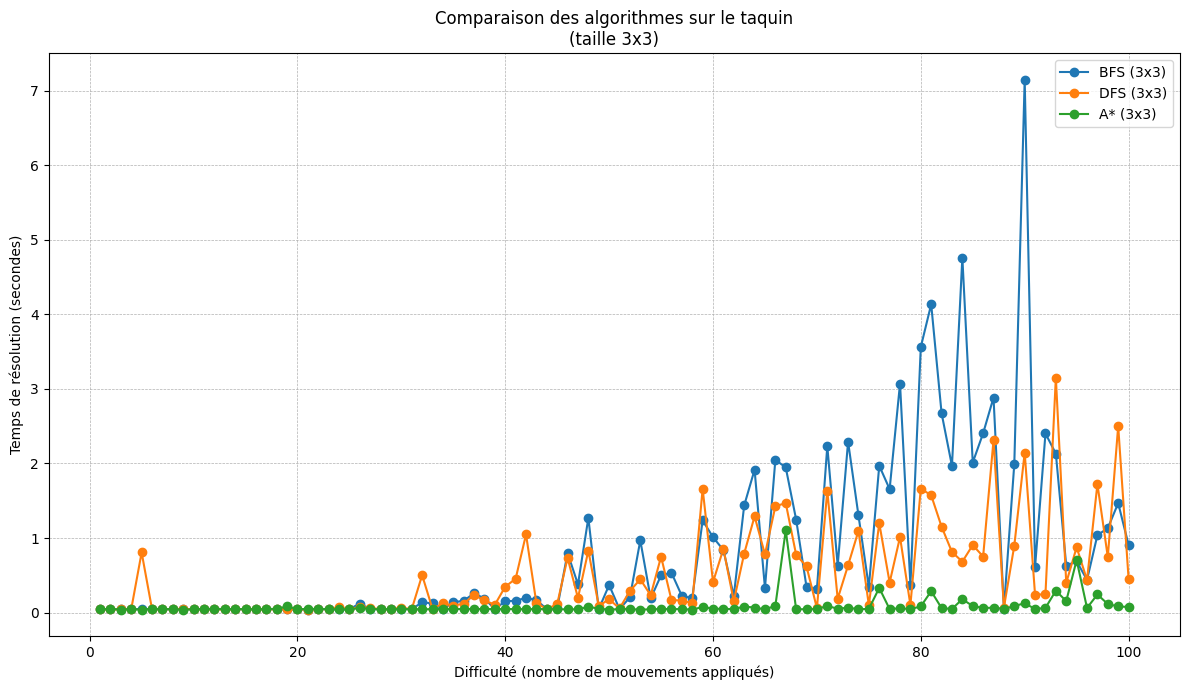

In [16]:
plt.figure(figsize=(12, 7))

# Création des courbes
for algo in ['BFS', 'DFS', 'A*']:
    times = [res[algo] for res in results_3x3]
    timeouts = [res[f'{algo}_timeouts'] for res in results_3x3]
    difficulties = [res['difficulte'] for res in results_3x3]
    
    plt.plot(difficulties, times, label=f'{algo} (3x3)', marker='o')
    
    # Marquer les points avec timeout
    timeout_points = [(d, t) for d, t, to in zip(difficulties, times, timeouts) if to > 0]
    if timeout_points:
        x, y = zip(*timeout_points)
        plt.scatter(x, y, color='red', s=100, alpha=0.5, label='Timeouts' if algo == 'BFS' else "")

plt.xlabel("Difficulté (nombre de mouvements appliqués)")
plt.ylabel("Temps de résolution (secondes)")
plt.title("Comparaison des algorithmes sur le taquin\n(taille 3x3)")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout()
plt.show()

## Test de performance pour la taille 4x4

In [10]:
results_4x4 = solve_puzzles_by_size('4x4', '4x4')

Résolution des puzzles de difficulté 1 pour 4x4
Résolution des puzzles de difficulté 2 pour 4x4
Résolution des puzzles de difficulté 3 pour 4x4
Résolution des puzzles de difficulté 4 pour 4x4
Résolution des puzzles de difficulté 5 pour 4x4
Résolution des puzzles de difficulté 6 pour 4x4
Résolution des puzzles de difficulté 7 pour 4x4
Résolution des puzzles de difficulté 8 pour 4x4
Résolution des puzzles de difficulté 9 pour 4x4
Résolution des puzzles de difficulté 10 pour 4x4
Résolution des puzzles de difficulté 11 pour 4x4
Résolution des puzzles de difficulté 12 pour 4x4
Résolution des puzzles de difficulté 13 pour 4x4
Résolution des puzzles de difficulté 14 pour 4x4
Résolution des puzzles de difficulté 15 pour 4x4
  solve_dfs: Timeout après 100s
Résolution des puzzles de difficulté 16 pour 4x4
Résolution des puzzles de difficulté 17 pour 4x4
Résolution des puzzles de difficulté 18 pour 4x4
Résolution des puzzles de difficulté 19 pour 4x4
Résolution des puzzles de difficulté 20 pour 4

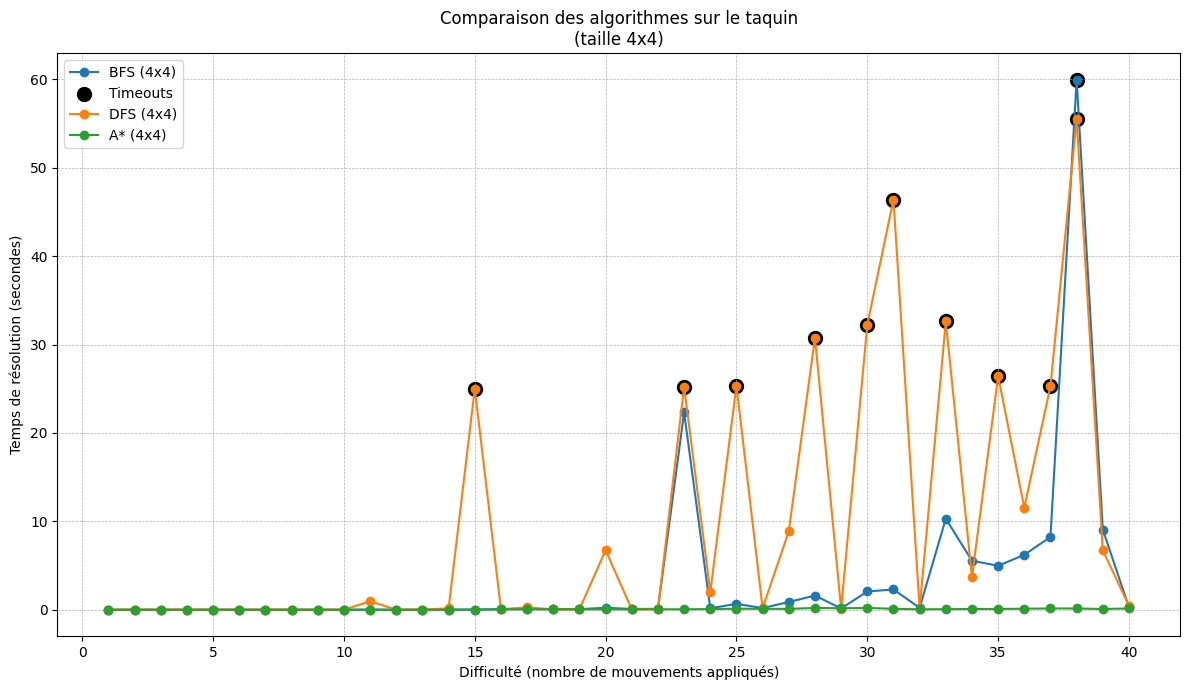

In [14]:
plt.figure(figsize=(12, 7))

for algo in ['BFS', 'DFS', 'A*']:
    times = [res[algo] for res in results_4x4]
    timeouts = [res[f'{algo}_timeouts'] for res in results_4x4]
    difficulties = [res['difficulte'] for res in results_4x4]

    plt.plot(difficulties, times, label=f'{algo} (4x4)', marker='o')

    # Marquer les points avec timeout
    timeout_points = [(d, t) for d, t, to in zip(difficulties, times, timeouts) if to > 0]
    if timeout_points:
        x, y = zip(*timeout_points)
        plt.scatter(x, y, color='black', s=100, label='Timeouts' if algo == 'BFS' else "")
plt.xlabel("Difficulté (nombre de mouvements appliqués)")
plt.ylabel("Temps de résolution (secondes)")
plt.title("Comparaison des algorithmes sur le taquin\n(taille 4x4)")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout()
plt.show()